In [2]:
# Step 2: Import YOLO from Ultralytics
from ultralytics import YOLO

# Step 3: Load Pretrained YOLOv5 Model
# You can choose between 'yolov5s', 'yolov5m', 'yolov5l', and 'yolov5x'.
# 's' is small, 'm' is medium, 'l' is large, 'x' is extra-large.
model = YOLO('yolov5s.pt')  # Loading the YOLOv5 small model

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
def plot_results(image_path, results):
    # Load the image
    img = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)

    # Get the current axis
    ax = plt.gca()

    # Plot each bounding box
    for box in results[0].boxes:
        # Move tensor to CPU if it's on CUDA
        xyxy = box.xyxy[0].cpu() if box.xyxy[0].is_cuda else box.xyxy[0]
        x1, y1, x2, y2 = xyxy.numpy()
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add label
        cls = int(box.cls.cpu().numpy()[0] if box.cls.is_cuda else box.cls.numpy()[0])
        conf = float(box.conf.cpu().numpy()[0] if box.conf.is_cuda else box.conf.numpy()[0])
        label = f"{results[0].names[cls]} {conf:.2f}"
        plt.text(x1, y1, label, color='white', fontsize=10, backgroundcolor='red')

    plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()



image 1/1 /content/img.jpg: 448x640 1 person, 7 cars, 2 trucks, 1 handbag, 12.4ms
Speed: 2.3ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


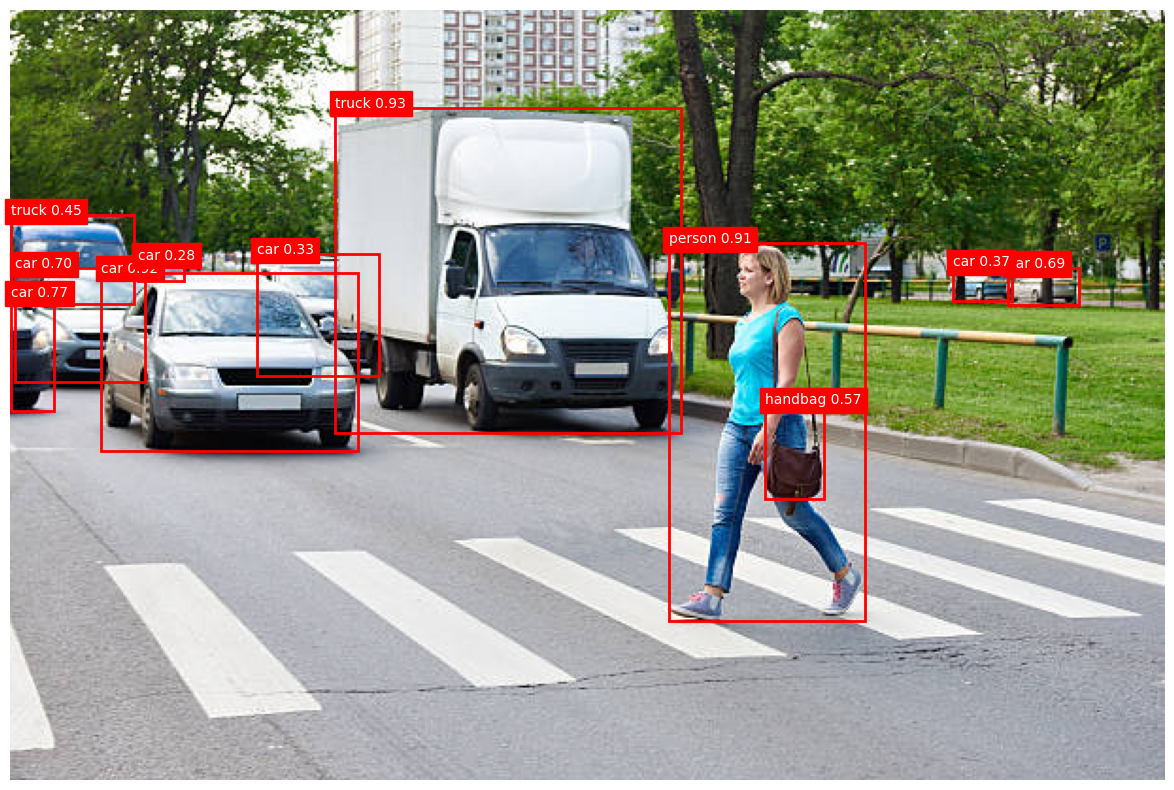

In [ ]:
image_path = 'img.jpg'
results = model(image_path)
plot_results(image_path, results)

In [ ]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou